## 1. Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

## 2. Load and Split Data

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df = np.array(df)
m,n = df.shape
np.random.shuffle(df)

In [4]:
data_dev = df[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = df[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [5]:
print(X_train.shape)
_,m = X_train.shape

(784, 41000)


In [6]:
Y_train.shape

(41000,)

## 2. Intializing Parameters

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

## 3. Forward Propagation

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [8]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def forward_prop(W1, b1, W2, b2, X, Y):
    one_hot_Y = one_hot(Y)
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    
    logprobs = np.multiply(np.log(A2), one_hot_Y) + np.multiply(np.log(1 - A2), (1 - one_hot_Y))
    cost = -np.sum(logprobs) / m
    
    return Z1, A1, Z2, A2, cost

## 4. Backward Propagation

In [ ]:
def ReLU_deriv(Z):
    return Z > 0

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):   
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## 3. Training Neural Network

In [ ]:
epochs = 2000
learningRate = 0.01
losses = np.zeros((epochs, 1))

# W1, b1, W2, b2 = init_params()

In [ ]:
for i in tqdm(range(epochs), desc="Training Progress"):
    Z1, A1, Z2, A2, losses[i, 0] = forward_prop(W1, b1, W2, b2, X_train, Y_train)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learningRate)
    
    if i % 500 == 0:
        print(losses[i,0])

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

## 4. Making Predictions

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [ ]:
def get_accuracy(predictions, Y):
#     print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
Z1, A1, Z2, A2, cost = forward_prop(W1, b1, W2, b2, X_train, Y_train)

In [ ]:
predictions = get_predictions(A2)

In [ ]:
print(get_accuracy(predictions, Y_train))

## 5. Accuracy 86.2 % 

In [ ]:
Z1, A1, Z2, A2, cost = forward_prop(W1, b1, W2, b2, X_dev , Y_dev)

In [ ]:
predictions = get_predictions(A2)

In [ ]:
print(get_accuracy(predictions, Y_dev))

## 6. Saving Parameters

In [ ]:
with open('parameters/W1.pkl', 'wb') as f:
    pickle.dump(W1, f)
    
with open('parameters/W2.pkl', 'wb') as f:
    pickle.dump(W2, f)

with open('parameters/b1.pkl', 'wb') as f:
    pickle.dump(b1, f)
    
with open('parameters/b2.pkl', 'wb') as f:
    pickle.dump(b2, f)

In [10]:
with open('parameters/W1.pkl', 'rb') as f:
    W1 = pickle.load(f)

with open('parameters/W2.pkl', 'rb') as f:
    W2 = pickle.load(f)
    
with open('parameters/b1.pkl', 'rb') as f:
    b1 = pickle.load(f)
    
with open('parameters/b2.pkl', 'rb') as f:
    b2 = pickle.load(f)

## 7. Let's Try our Model

In [11]:
def forward(W1, b1, W2, b2, X):
    print(X.shape)
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

In [12]:
index = 10

sample = X_dev[:, index, None]

_, _, _, A2 = forward(W1, b1, W2, b2, sample)

(784, 1)


In [13]:
predictions = get_predictions(A2)

print(f'Predicted Value: {predictions}')
print(f'Actual Value: {Y_dev[index]}')

Predicted Value: [4]
Actual Value: 4


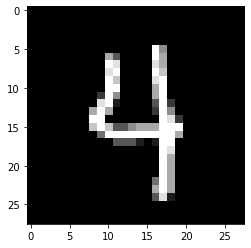

In [14]:
# Plotting Image

current_image = sample
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()